## Underfitting and Overfitting Problems 

* Typically the ramification of overfitting is poor performance on unseen data. If you're confident that overfitting on your dataset will not cause problems for situations not described by the dataset, or the dataset contains every possible scenario then overfitting may be good for the performance.


In [6]:
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(1, 21)
y = np.array([7, 8, 7, 13, 14, 15, 24, 27, 18, 21,19,23,24,22,26,28,25,30,32,36])

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.3)

In [8]:
x_train

array([16,  3, 19,  4, 17, 15, 13,  7,  9,  5,  2, 14,  6, 20])

In [9]:
y_train

array([28,  7, 32, 13, 25, 26, 24, 24, 18, 14,  8, 22, 15, 36])

## Under fitting

In [69]:
z = np.polyfit(x_train, y_train, 1)
z #a0 b

array([1.29983156, 6.93037619])

In [70]:
p1 = np.poly1d(z)

In [75]:
y_pre=p1(x_test) # predicted values
y_pre

array([ 8.23020775, 17.32902864, 22.52835486, 30.32734419, 21.2285233 ,
       19.92869175])

In [74]:
y_test

array([ 7, 27, 23, 30, 19, 21])

In [84]:
p1.coeffs

array([1.29983156, 6.93037619])

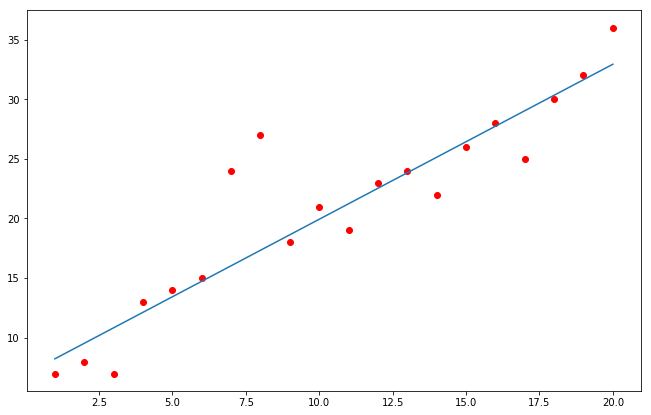

In [77]:
plt.figure(figsize=(11,7))
plt.plot(x, y, 'ro')
plt.plot(x,p1(x))
plt.show()

In [85]:
rmse = np.sqrt(mean_squared_error(y_pre, y_test))
r2 = r2_score(y_pre, y_test)
print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse))
print("R2 score of test set is {}".format(r2))

The model performance for the test set
-------------------------------------------
RMSE of test set is 4.112677940920706
R2 score of test set is 0.6099630234624577


## polynomial regression function of degree 3 (Best fitting)

In [15]:
z = np.polyfit(x_train, y_train, 3)
z #a0 a1 a2 b

array([ 0.01304839, -0.44427077,  5.6123031 , -3.53193919])

In [16]:
p3 = np.poly1d(z)

In [86]:
y_pre=p3(x_test) # predicted values
y_pre

array([ 1.64914153, 19.61393321, 22.38832925, 29.64401215, 21.81404205,
       21.21240721])

In [87]:
y_test # actual values 

array([ 7, 27, 23, 30, 19, 21])

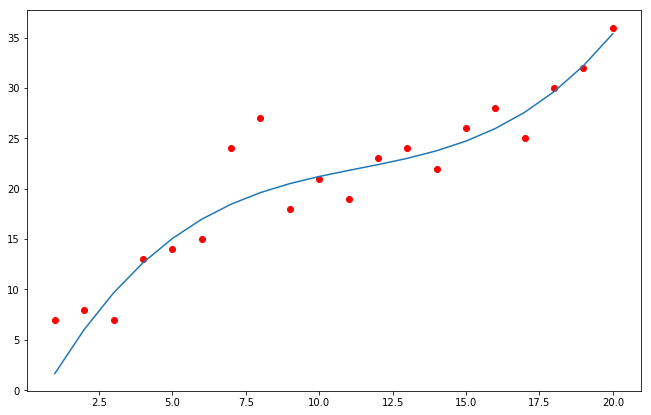

In [88]:
plt.figure(figsize=(11,7))
plt.plot(x, y, 'ro')
plt.plot(x,p3(x))
plt.show()

In [90]:
rmse = np.sqrt(mean_squared_error(y_pre, y_test))
r2 = r2_score(y_pre, y_test)
print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse))
print("R2 score of test set is {}".format(r2))

The model performance for the test set
-------------------------------------------
RMSE of test set is 3.908334828719615
R2 score of test set is 0.7908096456411836


## Polynomial Regression function of degree 20 (Overfitting)

In [95]:
z2 = np.polyfit(x_train, y_train, 14)
z2

C:\Users\harsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


array([ 3.43731382e-10, -4.14962885e-08,  2.08613401e-06, -5.30532454e-05,
        5.21799282e-04,  8.63996800e-03, -3.91754894e-01,  6.88203679e+00,
       -7.39779153e+01,  5.29860791e+02, -2.57028222e+03,  8.30330289e+03,
       -1.69979163e+04,  1.98010980e+04, -9.91086604e+03])

In [97]:
p14 = np.poly1d(z2)

In [98]:
y_pre=p14(x_test)
y_pre

array([-912.28143237,   26.52080144,   24.06741849,   42.29512237,
         16.8745607 ,   11.97515177])

In [99]:
y_test

array([ 7, 27, 23, 30, 19, 21])

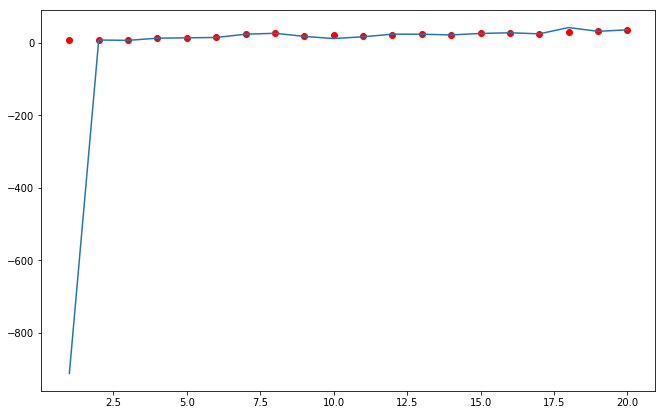

In [100]:
plt.figure(figsize=(11,7))
plt.plot(x, y, 'ro')
plt.plot(x,p14(x))
plt.show()

In [101]:
rmse = np.sqrt(mean_squared_error(x20_pre, y_test))
r2 = r2_score(x20_pre, y_test)
print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse))
print("R2 score of test set is {}".format(r2))

The model performance for the test set
-------------------------------------------
RMSE of test set is 89.02740285249018
R2 score of test set is 0.05497277144506785


In [102]:
p14(21)

3762.177267512063

In [103]:
p3(21)

39.24417939615308

For degree=20, the model is also capturing the noise in the data. This is an example of over-fitting. Even though this model passes through most of the data, **it will fail to generalize on unseen data**.

**To prevent over-fitting, we can add more training samples so that the algorithm doesn’t learn the noise in the system and can become more generalized. ( Note: adding more data can be an issue if the data is itself noise).**

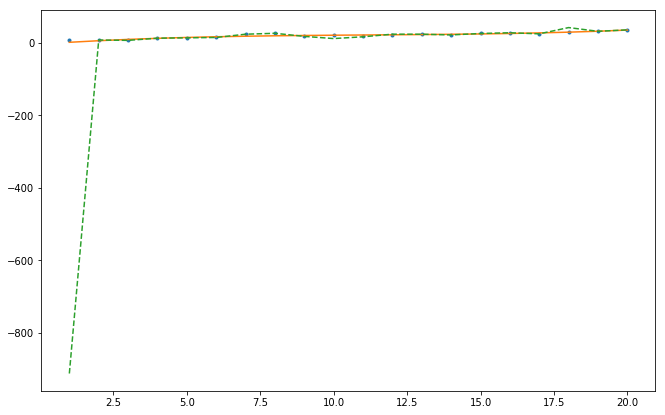

In [104]:
plt.figure(figsize=(11,7))
plt.plot(x, y, '.', x, p3(x), '-', x, p14(x), '--')
plt.ylim()
plt.show()

In [105]:
p14(x)

array([-912.28143237,    7.99999989,    6.99999785,   12.99999977,
         13.99999961,   14.9999995 ,   23.99999929,   26.52080144,
         17.99999951,   11.97515177,   16.8745607 ,   24.06741849,
         23.99999905,   21.99999875,   25.99999867,   27.99999972,
         24.99999898,   42.29512237,   31.99999936,   35.99999808])

In [106]:
p14(21) #it fail to generalize on unseen data

3762.177267512063

In [110]:
p14(22)

37101.619157560366

In [107]:
p3(x)

array([ 1.64914153,  6.01997107,  9.65883977, 12.64403799, 15.05385609,
       16.96658442, 18.46051335, 19.61393321, 20.50513438, 21.21240721,
       21.81404205, 22.38832925, 23.01355918, 23.7680222 , 24.73000864,
       25.97780888, 27.58971327, 29.64401215, 32.2189959 , 35.39295486])

In [108]:
p3(21)

39.24417939615308

In [30]:
y

array([ 7,  8,  7, 13, 14, 15, 24, 27, 18, 21, 19, 23, 24, 22, 26, 28, 25,
       30, 32, 36])

## Polynomial Regression function of degree 25 (Overfitting) by using whole dataset as training data

In [56]:
z3 = np.polyfit(x, y, 25)
z3

C:\Users\harsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


array([ 9.95884894e-21, -1.08295878e-18,  4.21974626e-17, -4.88902173e-16,
       -9.65263660e-15,  2.05086524e-13,  3.50224566e-12, -7.29076423e-11,
       -1.48817917e-09,  2.62644103e-08,  6.03338795e-07, -1.12200967e-05,
       -2.01913103e-04,  5.92551006e-03,  1.65123705e-02, -2.67932427e+00,
        5.49677071e+01, -6.44228126e+02,  5.07803481e+03, -2.83017440e+04,
        1.12888723e+05, -3.18998007e+05,  6.18930672e+05, -7.75669648e+05,
        5.56888752e+05, -1.70217866e+05])

In [57]:
p25 = np.poly1d(z3)

In [58]:
x25_pre=p25(x)
x25_pre

array([ 6.99988759,  8.00144102,  7.00397868, 13.00263958, 14.00592694,
       15.00596926, 24.00376588, 27.00441961, 18.00360643, 21.00436108,
       19.00500679, 23.00367587, 24.00349615, 22.00221273, 26.00582518,
       28.00173891, 25.00082061, 30.00689249, 32.00487522, 36.01957605])

In [59]:
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [60]:
y

array([ 7,  8,  7, 13, 14, 15, 24, 27, 18, 21, 19, 23, 24, 22, 26, 28, 25,
       30, 32, 36])

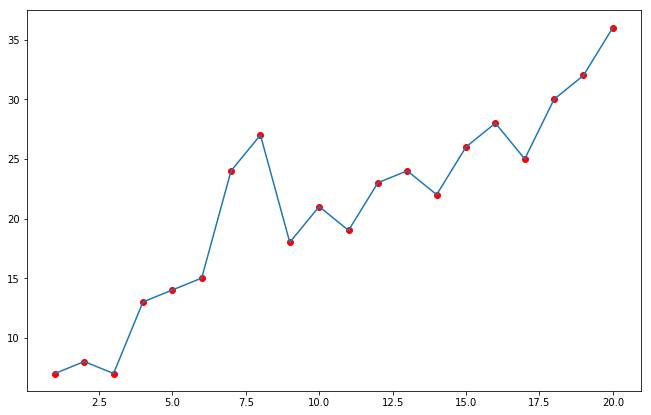

In [61]:
plt.figure(figsize=(11,7))
plt.plot(x, y, 'ro')
plt.plot(x,p25(x))
plt.show()

In [62]:
rmse = np.sqrt(mean_squared_error(x25_pre, y))
r2 = r2_score(x25_pre, y)
print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of test training is {}".format(rmse))
print("R2 score of test training is {}".format(r2))

The model performance for the training set
-------------------------------------------
RMSE of test training is 0.0059548814146395705
R2 score of test training is 0.9999994542836059


In [63]:
p25(21)

6783505.723411831

In [37]:
p3(21)

39.24417939615308

#### How do we choose an optimal model? To answer this question we need to understand the bias vs variance trade-off.

**The Bias vs Variance trade-off**                                      
**Bias** refers to the error due to the model’s simplistic assumptions in fitting the data. A high bias means that the model is unable to capture the patterns in the data and this results in **under-fitting.**

**Variance** refers to the error due to the complex model trying to fit the data. High variance means the model passes through most of the data points and it results in **over-fitting** the data.

**The below picture summarizes**

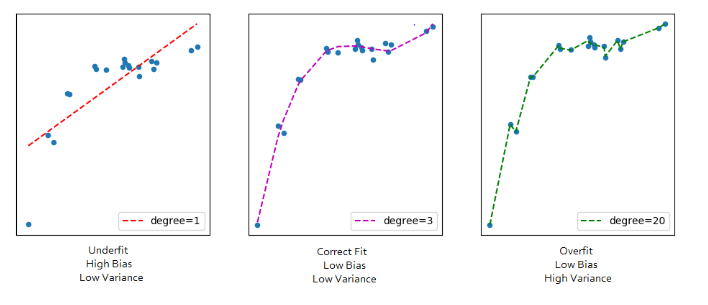

In [3]:
from IPython.display import Image
Image(filename='image1.png')

From the below picture we can observe that as the model complexity increases, the **bias decreases** and the **variance increases** and vice-versa. Ideally, a machine learning model should have low variance and low bias. But practically it’s impossible to have both. Therefore to achieve a good model that performs well both on the train and unseen data, a trade-off is made.

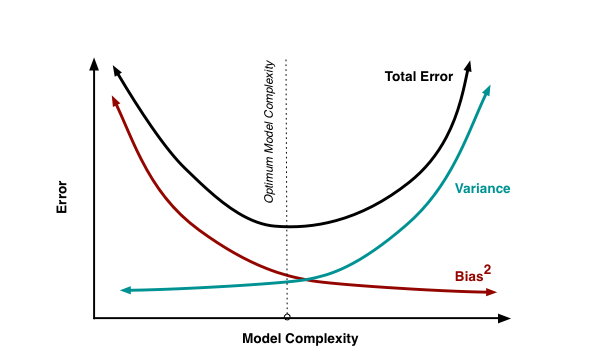

In [4]:
Image(filename='image2.png')

## Another Example for over fitting

In [2]:
x1 = np.arange(1, 11)
y1= np.array([7, 8, 7, 13, 16, 15, 19, 23, 18, 21])

In [396]:
x1_t= np.arange(1, 16)
y1_t= np.append(y1, [24, 23, 22, 26, 22])

In [397]:
z3 = np.polyfit(x1, y1, 10)
z3

C:\Users\harsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


array([-2.15104697e-05,  8.24830681e-04, -1.08590977e-02,  2.82457120e-02,
        7.14909227e-01, -8.52750756e+00,  4.30885990e+01, -1.13982694e+02,
        1.56450007e+02, -9.87043111e+01,  2.79428077e+01])

In [398]:
p10 = np.poly1d(z3)

In [399]:
x10_pre=p10(x1)
x10_pre

array([ 7.,  8.,  7., 13., 16., 15., 19., 23., 18., 21.])

In [400]:
y1

array([ 7,  8,  7, 13, 16, 15, 19, 23, 18, 21])

In [401]:
y1_t

array([ 7,  8,  7, 13, 16, 15, 19, 23, 18, 21, 24, 23, 22, 26, 22])

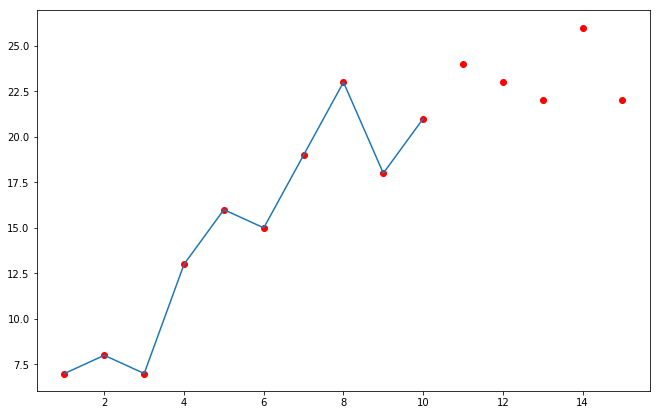

In [406]:
plt.figure(figsize=(11,7))
plt.plot(x1_t, y1_t, 'ro')
plt.plot(x1,p10(x1))
axes.set_ylim([0, 30])
plt.show()

In [408]:
p10(x1_t)

array([ 7.00000000e+00,  8.00000000e+00,  7.00000000e+00,  1.30000000e+01,
        1.60000000e+01,  1.50000000e+01,  1.90000000e+01,  2.30000000e+01,
        1.80000000e+01,  2.10000000e+01, -1.70057192e+02, -2.35862912e+03,
       -1.42627747e+04, -5.99263570e+04, -2.01289249e+05])

In [409]:
y1_t

array([ 7,  8,  7, 13, 16, 15, 19, 23, 18, 21, 24, 23, 22, 26, 22])

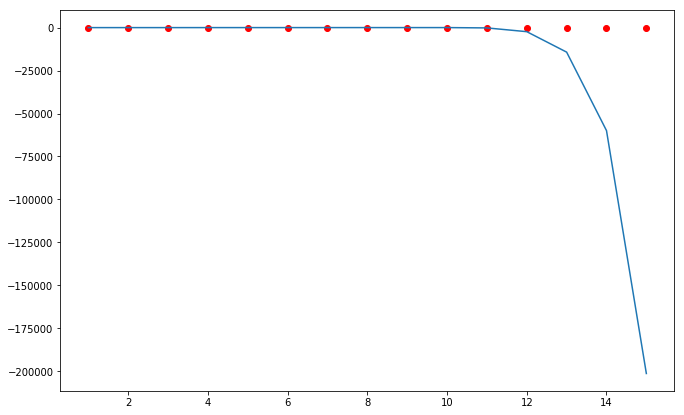

In [407]:
plt.figure(figsize=(11,7))
plt.plot(x1_t, y1_t, 'ro')
plt.plot(x1_t,p10(x1_t))
axes.set_ylim([0, 30])
plt.show()